In [23]:
import scipy.io
import mne
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, integrate
import h5py



mat = scipy.io.loadmat('D:/DEAP DATA/s1.mat')
data = mat['data']

one_data = data[0]


print(data.shape)
print(np.amax(data)) # max value
print(np.amin(data)) # min value

(40, 40, 8064)
88203.74898616385
-206259.3943791547


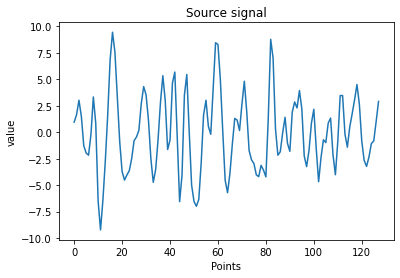

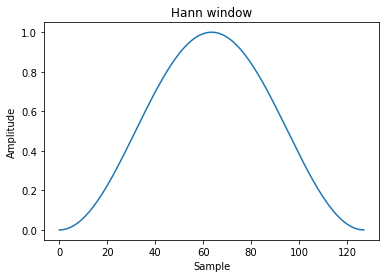

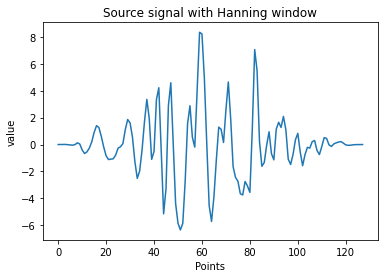

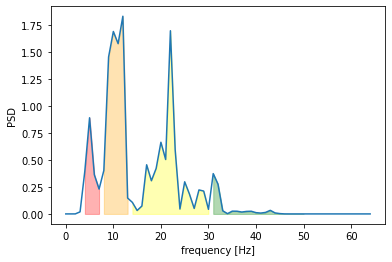

In [24]:
# original 128 points signal (1 second)
plt.plot(one_data[0][:128])
plt.title("Source signal")
plt.xlabel('Points')
plt.ylabel('value')
plt.show()

# visualise hanning window
window = np.hanning(128)
plt.plot(window)
plt.title("Hann window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()

# signal with hanning window
plt.plot(one_data[0][:128]*window)
plt.title("Source signal with Hanning window")
plt.xlabel('Points')
plt.ylabel('value')
plt.show()

# visualise PSD feature
# theta waves (4–7 Hz), alpha waves (8–13Hz), beta waves (14–30 Hz) and gamma waves (31–50 Hz)
f, Pxx_den = signal.welch(one_data[0][:128], fs=128, window='hann', nperseg = 128, noverlap=64)
plt.plot(f, Pxx_den)
plt.fill_between(f[4:8], Pxx_den[4:8], alpha = 0.3, color='red')
plt.fill_between(f[8:14], Pxx_den[8:14], alpha = 0.3, color='orange')
plt.fill_between(f[14:31], Pxx_den[14:31], alpha = 0.3, color='yellow')
plt.fill_between(f[31:51], Pxx_den[31:51], alpha = 0.3, color='green')
plt.ylim()
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.show()

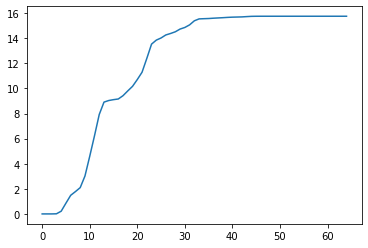

Frequency band power of first channel of first frame:  [1.56416282 6.8154092  5.82264616 0.68714631]


In [25]:
# use integration to calculate frequency band power
x = f
y = Pxx_den
y_int = integrate.cumtrapz(y, x, initial=0)
plt.plot(x, y_int)
plt.show()

band_power = np.array([y_int[7]-y_int[4],y_int[13]-y_int[8],y_int[30]-y_int[14],y_int[51]-y_int[31]])
print("Frequency band power of first channel of first frame: ", band_power)